In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from pathlib import Path
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# function that takes two parameters (age , investment_amount) and returns a list of ["yhat_lower","yhat","yhat_upper"]
# you will call read_dataframe function 
# then you will call close_data_column function
# then you call future dataframe function
# then you will call forecase and future prediction function
# then make a list of ["yhat_lower","yhat","yhat_upper"] and return


In [3]:
# def main_funtion(age, investment_amount):
    # invetsment amount: cumulative amount*initial amount
    # age: retirement - age, or set the retirement age
    # return print("if you retire at this age you will get this return")
    #choose different types of investments
    # risk level determines what portfolio to use when using the read dataframe function 

In [4]:
# read_dataframe function and read spy.csv from Resources folder
def read_dataframe_function():
    df = pd.read_csv(Path("./Resources/spy.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
    df= df["Close"]
    df = df.reset_index()
    df.columns= ["ds","y"]

    return df



In [5]:
spy_df = read_dataframe_function()
spy_df

,ds,y
0,2014-01-02,154.989548
1,2014-01-03,154.964035
2,2014-01-06,154.515045
3,2014-01-07,155.464020
4,2014-01-08,155.497864
...,...,...
2300,2023-02-22,398.540008
2301,2023-02-23,400.660004
2302,2023-02-24,396.380005
2303,2023-02-27,397.730011


In [6]:
# keep only close and date column function

In [15]:
# make new future dataframe function
# 65-age  or ask people what age do you want to retire 
def future_dataframe(spy_df):
    model = Prophet()
    model
    model.fit(spy_df)
    model_df = model.make_future_dataframe(periods=365, freq="D")
    final_model_df = model.predict(model_df)
    plot = model.plot_components(final_model_df)
    final_model_df = final_model_df[["yhat_lower","yhat_upper","yhat","ds"]]
    final_model_df = final_model_df.set_index('ds')
    final_model_df = final_model_df.rename(columns = {'yhat_upper': 'best case',
                                              'yhat_lower':'worst case', 
                                              'yhat':'most likely case'})

    
    return final_model_df, plot

    
    

15:40:25 - cmdstanpy - INFO - Chain [1] start processing
15:40:26 - cmdstanpy - INFO - Chain [1] done processing


(            worst case   best case  most likely case
 ds                                                  
 2014-01-02  145.264332  176.219298        160.237913
 2014-01-03  143.601821  176.163456        160.303631
 2014-01-06  144.854102  177.666957        160.742255
 2014-01-07  145.541300  176.926545        160.834874
 2014-01-08  145.141801  177.242062        160.848003
 ...                ...         ...               ...
 2024-02-24  326.262326  409.529528        369.989356
 2024-02-25  323.228517  410.030349        369.427603
 2024-02-26  321.916068  409.612844        369.280150
 2024-02-27  324.548196  409.876682        368.715767
 2024-02-28  321.695572  408.410940        368.086597
 
 [2670 rows x 3 columns],
 <Figure size 900x900 with 3 Axes>)

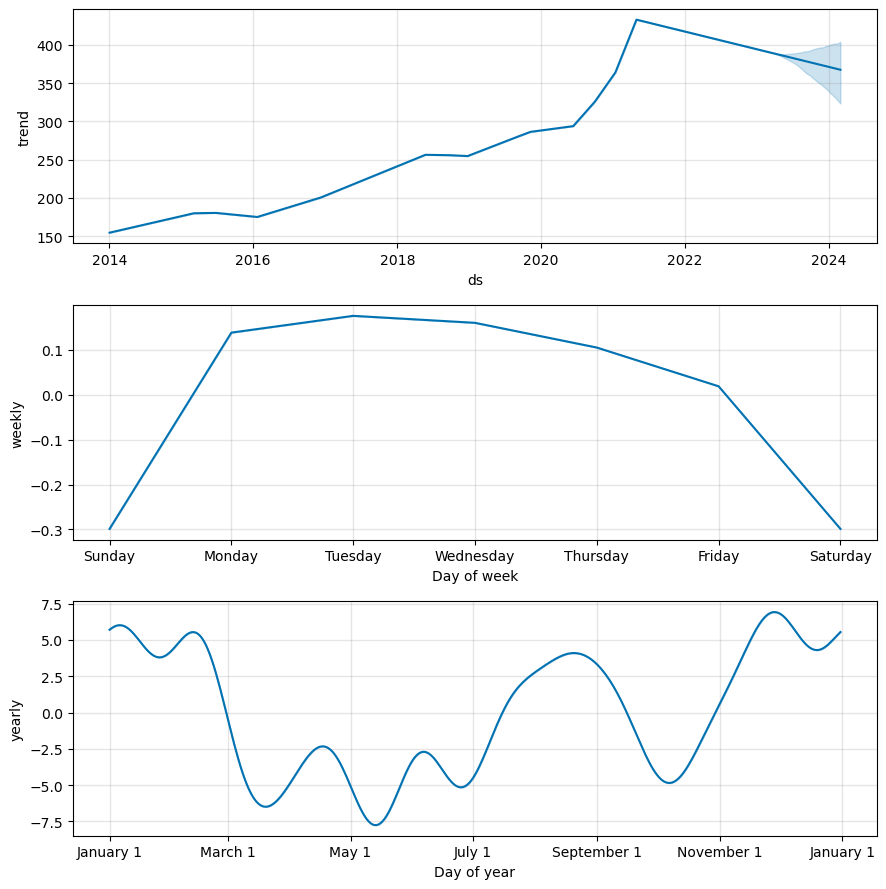

In [16]:
prediction_df = future_dataframe(spy_df)
prediction_df

#module 11 - Bria

In [20]:
def main_funtion():
    spy_df = read_dataframe_function()
    prediction_df = future_dataframe(spy_df)
    prediction_df
    
    return prediction_df

    

15:45:29 - cmdstanpy - INFO - Chain [1] start processing
15:45:30 - cmdstanpy - INFO - Chain [1] done processing


(            worst case   best case  most likely case
 ds                                                  
 2014-01-02  144.592890  176.808891        160.237913
 2014-01-03  143.997410  177.133448        160.303631
 2014-01-06  144.795896  176.583046        160.742255
 2014-01-07  145.925078  176.756086        160.834874
 2014-01-08  145.033504  177.083312        160.848003
 ...                ...         ...               ...
 2024-02-24  326.772152  411.046903        369.989356
 2024-02-25  324.891604  411.684033        369.427603
 2024-02-26  321.934393  412.618839        369.280150
 2024-02-27  321.522062  412.449903        368.715767
 2024-02-28  322.036072  414.030915        368.086597
 
 [2670 rows x 3 columns],
 <Figure size 900x900 with 3 Axes>)

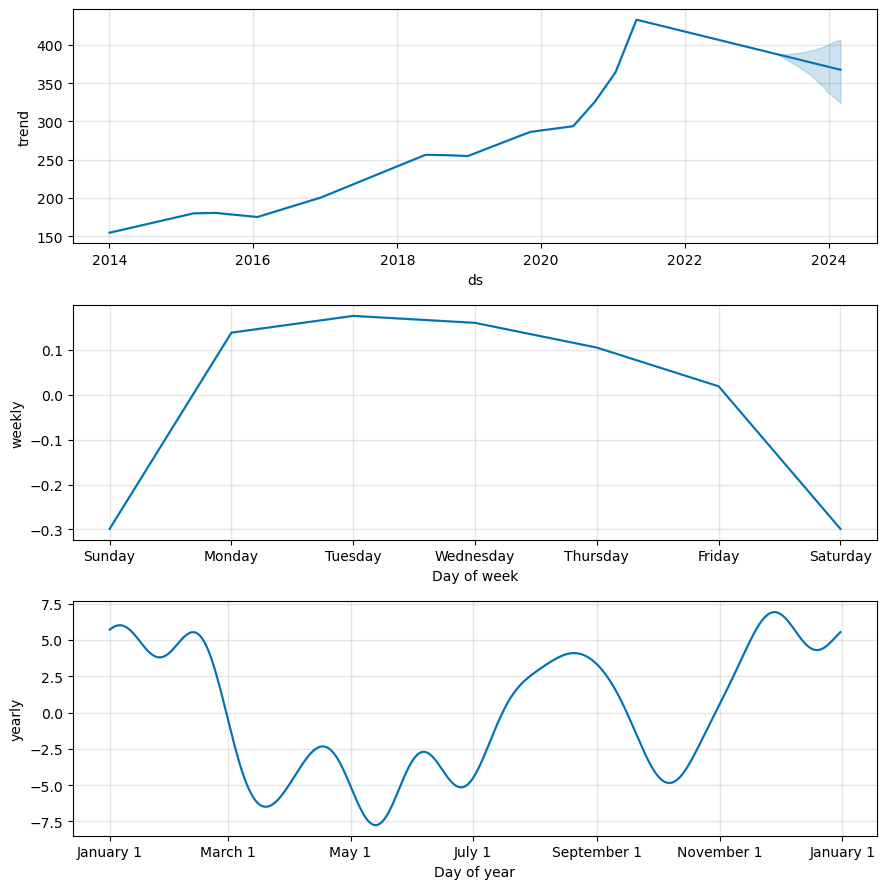

In [21]:
main_funtion()